In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from os.path import join

import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.utils import to_categorical

In [2]:
datax = np.load(join('data', 'MNIST.npy'))
datay = np.load(join('data', 'Label.npy'))


In [4]:
datax_norm = datax/255
print('최대 : {}, 최소 : {}'.format(np.max(datax_norm), np.min(datax_norm)))

최대 : 1.0, 최소 : 0.0


In [5]:
datay_onehot = to_categorical(datay)
print(datay[0:10])
print(datay_onehot[0:10,:])

[5 0 4 1 9 2 1 3 1 4]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [7]:
# Train, Test Data Split
from sklearn.model_selection import train_test_split
trnx, tstx, trny, tsty = train_test_split(datax_norm, datay_onehot, test_size = 0.3, random_state =111)

In [8]:
print(trnx.shape)
print(trny.shape)

(42000, 28, 28)
(42000, 10)


In [11]:
input_shape = (28,28,1)
cnn_model = models.Sequential()

cnn_model.add(layers.Conv2D(16,(2,2), padding='same', input_shape=input_shape))
cnn_model.add(layers.BatchNormalization())
cnn_model.add(layers.Activation("relu"))
cnn_model.add(layers.MaxPooling2D((2,2)))

cnn_model.add(layers.Conv2D(16,(2,2), padding='same'))
cnn_model.add(layers.BatchNormalization())
cnn_model.add(layers.Activation("relu"))
cnn_model.add(layers.Dropout(0.2))
cnn_model.add(layers.MaxPooling2D((2,2)))

cnn_model.add(layers.Flatten())

cnn_model.add(layers.Dense(units = 128, activation = "relu"))
cnn_model.add(layers.Dense(units = 10, activation = "softmax"))

cnn_model.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [12]:
cnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 16)        80        
                                                                 
 batch_normalization_4 (Batc  (None, 28, 28, 16)       64        
 hNormalization)                                                 
                                                                 
 activation_4 (Activation)   (None, 28, 28, 16)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 16)        1040      
                                                                 
 batch_normalization_5 (Batc  (None, 14, 14, 16)      

In [14]:
# 입력값들을 CNN에 넣기 위해 4D tensor로 변환 (row, height, width, depth)
trnx_reshape = trnx.reshape(-1,28,28,1)
tstx_reshape = tstx.reshape(-1,28,28,1)
trnx_reshape.shape

(42000, 28, 28, 1)

In [15]:
histroy = cnn_model.fit(trnx_reshape, trny, validation_data = [tstx_reshape,tsty], batch_size = 50, epochs = 100)

Epoch 1/100
840/840 [==============================] - 59s 67ms/step - loss: 0.2121 - accuracy: 0.9340 - val_loss: 0.0931 - val_accuracy: 0.9739
Epoch 2/100
840/840 [==============================] - 58s 69ms/step - loss: 0.0825 - accuracy: 0.9742 - val_loss: 0.0707 - val_accuracy: 0.9782
Epoch 3/100
840/840 [==============================] - 54s 64ms/step - loss: 0.0569 - accuracy: 0.9819 - val_loss: 0.0665 - val_accuracy: 0.9791
Epoch 4/100
840/840 [==============================] - 54s 64ms/step - loss: 0.0453 - accuracy: 0.9851 - val_loss: 0.0580 - val_accuracy: 0.9827
Epoch 5/100
840/840 [==============================] - 54s 64ms/step - loss: 0.0384 - accuracy: 0.9871 - val_loss: 0.0446 - val_accuracy: 0.9866
Epoch 6/100
840/840 [==============================] - 58s 69ms/step - loss: 0.0319 - accuracy: 0.9893 - val_loss: 0.0539 - val_accuracy: 0.9829
Epoch 7/100
840/840 [==============================] - 52s 61ms/step - loss: 0.0284 - accuracy: 0.9909 - val_loss: 0.0482 - val_ac

840/840 [==============================] - 54s 64ms/step - loss: 0.0028 - accuracy: 0.9988 - val_loss: 0.0613 - val_accuracy: 0.9893
Epoch 58/100
840/840 [==============================] - 50s 59ms/step - loss: 0.0031 - accuracy: 0.9990 - val_loss: 0.0652 - val_accuracy: 0.9898
Epoch 59/100
840/840 [==============================] - 50s 60ms/step - loss: 0.0050 - accuracy: 0.9984 - val_loss: 0.0578 - val_accuracy: 0.9889
Epoch 60/100
840/840 [==============================] - 50s 59ms/step - loss: 0.0035 - accuracy: 0.9986 - val_loss: 0.0581 - val_accuracy: 0.9892
Epoch 61/100
840/840 [==============================] - 54s 64ms/step - loss: 0.0046 - accuracy: 0.9985 - val_loss: 0.0547 - val_accuracy: 0.9907
Epoch 62/100
840/840 [==============================] - 50s 59ms/step - loss: 0.0025 - accuracy: 0.9990 - val_loss: 0.0551 - val_accuracy: 0.9898
Epoch 63/100
840/840 [==============================] - 50s 60ms/step - loss: 0.0033 - accuracy: 0.9990 - val_loss: 0.0658 - val_accuracy

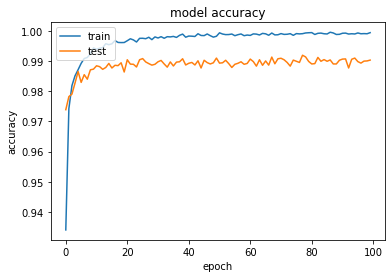

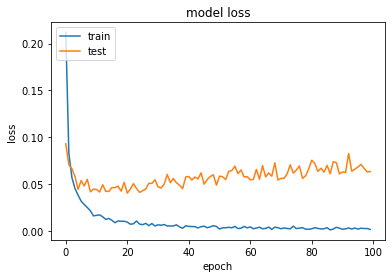

0.9903333187103271
0.991944432258606


In [18]:
# 학습과정 시각화
plt.plot(histroy.history['accuracy'])
plt.plot(histroy.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

# Train data / Test Data Loss 시각화
plt.plot(histroy.history['loss'])
plt.plot(histroy.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show() 
print(histroy.history['val_accuracy'][-1])
print(np.max(histroy.history['val_accuracy']))


---